In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
e = st.norm()

In [3]:
def G(mu, delta):
    return e.cdf(mu) - e.cdf(mu + delta)

def g(mu, delta):
    return e.pdf(mu) - e.pdf(mu+delta)

def func1(mu1, mu2, delta):
    return G(mu1, delta)*G(mu2, delta)*(1 + (mu1 + mu2)/delta) + (G(mu1, delta)*g(mu2, delta) + G(mu2, delta)*g(mu1, delta))/delta

In [4]:
a,b,c = 200,200,200
mu1s = np.linspace(0.01, 30, a)
mu2s = np.linspace(0.01, 30, b)
deltas = np.linspace(-30, -0.01, c)

mu1gri, mu2gri, delgri = np.meshgrid(mu1s, mu2s, deltas)

In [5]:
result = func1(mu1gri, mu2gri, delgri)

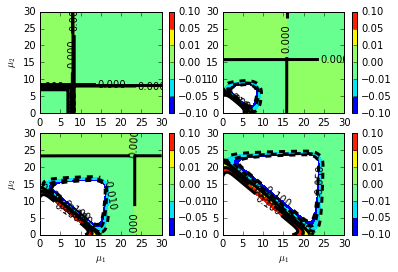

In [12]:
levels = [ -0.1,-0.05, -0.01, 0, 0.01, 0.05, 0.1]

plt.subplot(221)
cs3 = plt.contourf(mu1s, mu2s,result[:,:,199], levels, cmap = plt.cm.jet)
cs4 = plt.contour(mu1s, mu2s,result[:,:,199], levels, colors = ('k', ), linewidths = (3, ))
plt.clabel(cs4)
plt.colorbar(cs3)
plt.ylabel(r"$\mu_2$")

plt.subplot(222)
cs3 = plt.contourf(mu1s, mu2s,result[:,:,150], levels, cmap = plt.cm.jet)
cs4 = plt.contour(mu1s, mu2s,result[:,:,150], levels, colors = ('k', ), linewidths = (3, ))
plt.clabel(cs4)
plt.colorbar(cs3)


plt.subplot(223)
cs3 = plt.contourf(mu1s, mu2s,result[:,:,100], levels, cmap = plt.cm.jet)
cs4 = plt.contour(mu1s, mu2s,result[:,:,100], levels, colors = ('k', ), linewidths = (3, ))
plt.clabel(cs4)
plt.colorbar(cs3)
plt.xlabel(r"$\mu_1$")
plt.ylabel(r"$\mu_2$")

plt.subplot(224)
cs3 = plt.contourf(mu1s, mu2s,result[:,:,50], levels, cmap = plt.cm.jet)
cs4 = plt.contour(mu1s, mu2s,result[:,:,50], levels, colors = ('k', ), linewidths = (3, ))
plt.clabel(cs4)
plt.colorbar(cs3)
plt.xlabel(r"$\mu_1$")

plt.savefig("diff3.png")
plt.show()

In [111]:
def zerocheck(p):
    levels = [ -0.1,-0.05, -0.01, 0, 0.01, 0.05, 0.1]
    cs3 = plt.contourf(mu1s, mu2s,result[:,:,p], levels, cmap = plt.cm.jet)
    cs4 = plt.contour(mu1s, mu2s,result[:,:,p], levels, colors = ('k', ), linewidths = (3, ))
    plt.clabel(cs4)
    plt.colorbar(cs3)
    plt.xlabel(r"$\mu_1$")
    plt.ylabel(r"$\mu_2$")
    plt.savefig("%s.png" %p)
    plt.show()

-30.0


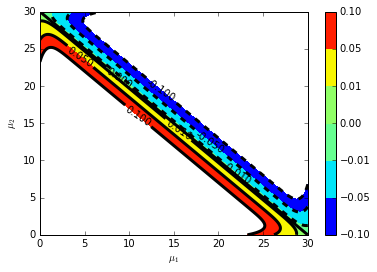

In [112]:
# deltaの絶対値が大きいケース
print(deltas[0])
zerocheck(0)

-22.4648241206


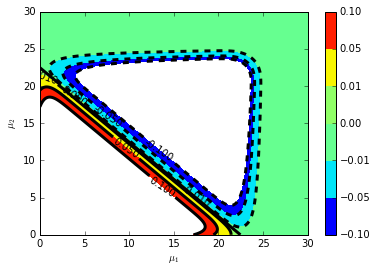

In [113]:
# deltaの絶対値が大きいケース
print(deltas[50])
zerocheck(50)

-14.9296482412


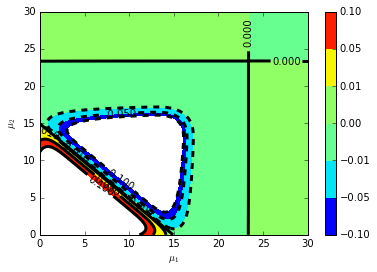

In [114]:
# deltaの絶対値が小さいケース
print(deltas[100])
zerocheck(100)

-7.39447236181


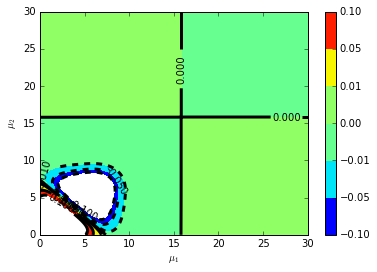

In [115]:
# 小さいケース
print(deltas[150])
zerocheck(150)

-0.01


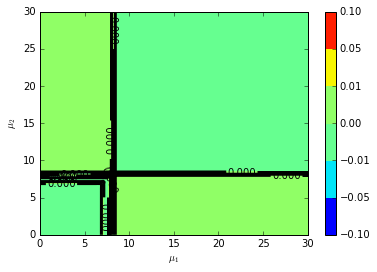

In [116]:
# 小さいケース
print(deltas[199])
zerocheck(199)